<a href="https://colab.research.google.com/github/joanadecaa1/data_processing/blob/main/spark/examples/01-rdds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Collections (RDDs)

# Setting up PySpark

In [1]:
%pip install pyspark

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master('local').appName('Spark Course').config('spark.ui.port', '4050').getOrCreate()

In [3]:
# diff between SparkSession and SparkContext

In [4]:
sc = SparkSession.getActiveSession().sparkContext

# RDDs

In [5]:
data = [1, 2, 3, 4, 5]
distData = sc.parallelize(data)

### Parallelized collections are created by calling SparkContext’s parallelize method on an existing iterable or collection in your driver program
### The elements of the collection are copied to form a distributed dataset that can be operated on in parallel


In [6]:
### Run parallel operations
distData.reduce(lambda a, b: a + b)

### One important parameter for parallel collections is the number of partitions to cut the dataset into
### Spark will run one task for each partition of the cluster
### Typically you want 2-4 partitions for each CPU in your cluster
### Normally, Spark tries to set the number of partitions automatically based on your cluster
### However, you can also set it manually

distData = sc.parallelize(data, 10)

In [9]:
distData.reduce(lambda a, b: a + b)

15

In [10]:
distData.getNumPartitions()

10

In [11]:
a=1+2+3+4+5

In [12]:
a

15

In [14]:
!mkdir /content/files/  #Criando um folder files dentro de um content
text = "red yellow white green"

text_file = open("/content/files/data.txt", "w")
text_file.write(text)
text_file.close()



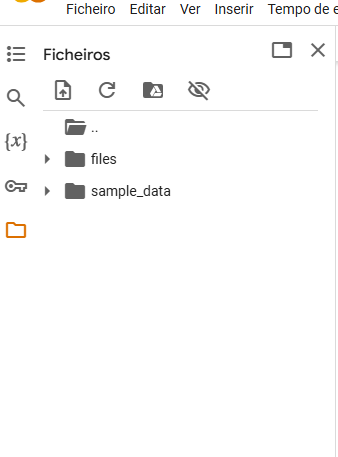

In [19]:
text

'red yellow white green'

In [15]:
### Read from external datasets
distFile = sc.textFile("data.txt")

In [ ]:
### RDDs support two types of operations: transformations, which create a new dataset from an existing one, and actions, which return a value to the driver program after running a computation on the dataset

### Example:
### map is a transformation that passes each dataset element through a function and returns a new RDD representing the results
### reduce is an action that aggregates all the elements of the RDD using some function and returns the final result to the driver program

In [16]:
### All transformations in Spark are lazy
### The transformations are only computed when an action requires a result to be returned to the driver program

lines = sc.textFile("/content/files/data.txt")
lineLengths = lines.map(lambda s: len(s))
totalLength = lineLengths.reduce(lambda a, b: a + b)
print(totalLength)

### The first line defines a base RDD from an external file.
### lines is merely a pointer to the file
### The second line defines lineLengths as the result of a map transformation
### lineLengths is not immediately computed, due to laziness
### reducer is an actions so Spark breaks the computation into tasks to run on separate machines
### and each machine runs both its part of the map and a local reduction, returning only its answer to the driver program.

22


In [17]:
lines.collect()  #vai devolver sempre lista mesmo que seja uma string

['red yellow white green']

In [18]:
### if we want to use lineLenghts again
lineLengths.persist()
### before the reduce, which would cause lineLengths to be saved in memory after the first time it is computed.

PythonRDD[9] at RDD at PythonRDD.scala:53